# PARTIE 1 : ANALYSE DE DONNÉES  
# Travaux préparatoires
## Objectifs :
#### - Import des librairies python et des données FAO (fournies pas OC)
#### - Création du dataframe principal sur lequel je me baserai pour répondre à chacune des questions

## Méthode :
Je commence à importer puis nettoyer toutes les tables de la FAO (données fournies par OpenClassrooms) :
- Bilan alimentaire des produits d’origine animale pour l'année 2013 (fr_animaux.csv)
- Bilan alimentaire des produits d’origine végétale pour l'année 2013 (fr_vegetaux.csv)
- Production totale de céréales de chaques pays pour l'année 2013 (fr_céréales.csv)
- Population totale de chaque pays pour l'année 2013 (fr_population.csv)
- Population sous-alimentée totale de chaque pays par période d'un an entre 2012 et 2018 (fr_soousalimentation.csv)

Je rassemble ensuite toutes ces tables en un seul dataframe que je pivote afin d'avoir pour chaque ligne tous les éléments informatifs par produit par pays pour l'année 2013.  
Ces éléments me permettront de répondre aux questions du projet.

<b><i>Commentaire :</i></b>  
<i>Les fichiers mis à disposition par la FAO sont détaillés par Pays. Cela nous arrange sauf dans le cas de la Chine dont la taille de la population et l'éclatement géographique ont décidé la FAO à la sous-détailler.  
Cela a créé des lignes redondantes dans les fichiers : nous avons des lignes pour Macao, Honk-Kong, Taïwan et la Chine continentale ainsi qu'une ligne 'Chine' représentant le total des lignes précédentes.  
J'ai fait le choix de supprimer de mon dataframe finale la ligne Chine (totale) afin d'éviter des erreurs de calcul.</i>

Commençons tout de suite par l'import des librairies Python et la configuration de l'affichage des dataframes.

In [1]:
# Importation des librairies
#import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Configuration
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

Passons maintenant à l'import du bilan alimentaire des produits d'origine animale pour l'année 2013 et à la création du dataframe correspondant : df_produits_animaux

In [2]:
# Import du bilan alimentaire des produits d'origine animale pour l'année 2013 et création du dataframe : df_produits_animaux
df_produits_animaux = pd.read_csv("Sources/fr_animaux.csv", delimiter=",", decimal=".")[['Code zone',
                                                             'Zone',
                                                             'Élément',
                                                             'Code Produit',
                                                             'Produit',
                                                             'Année',
                                                             'Valeur']]

# On renomme certaines colonnes
df_produits_animaux.columns = ['Code Pays',
                                'Pays',
                                'Élément',
                                'Code Produit',
                                'Produit',
                                'Année',
                                'Valeur']

# La colonne 'origine' est créée et renseignée afin d'identifier immédiatement l'origine des produits dans le dataframe finale
df_produits_animaux['origine'] = 'animale'

# Affichage du dataframe df_produits_animaux 
df_produits_animaux.head(5)

,Code Pays,Pays,Élément,Code Produit,Produit,Année,Valeur,origine
0,2,Afghanistan,Production,2731,Viande de Bovins,2013,134.00,animale
1,2,Afghanistan,Importations - Quantité,2731,Viande de Bovins,2013,6.00,animale
2,2,Afghanistan,Disponibilité intérieure,2731,Viande de Bovins,2013,140.00,animale
3,2,Afghanistan,Nourriture,2731,Viande de Bovins,2013,140.00,animale
4,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,4.59,animale


Passons maintenant à l'import du bilan alimentaire des produits d'origine végétale pour l'année 2013 et à la création du dataframe correspondant : df_produits_vegetaux

In [3]:
# Import du bilan alimentaire des produits d'origine végétale pour l'année 2013 et création du dataframe : df_produits_vegetaux
df_produits_vegetaux = pd.read_csv("Sources/fr_vegetaux.csv", delimiter=",", decimal=".")[['Code zone',
                                                             'Zone',
                                                             'Élément',
                                                             'Code Produit',
                                                             'Produit',
                                                             'Année',
                                                             'Valeur']]

# On renomme certaines colonnes
df_produits_vegetaux.columns = ['Code Pays',
                                'Pays',
                                'Élément',
                                'Code Produit',
                                'Produit',
                                'Année',
                                'Valeur']

# La colonne 'origine' est créée et renseignée afin d'identifier immédiatement l'origine des produits dans le dataframe finale
df_produits_vegetaux['origine'] = 'végétale'

# Affichage du dataframe df_produits_vegetaux 
df_produits_vegetaux.head(5)

,Code Pays,Pays,Élément,Code Produit,Produit,Année,Valeur,origine
0,2,Afghanistan,Production,2511,Blé,2013,5169.0,végétale
1,2,Afghanistan,Importations - Quantité,2511,Blé,2013,1173.0,végétale
2,2,Afghanistan,Variation de stock,2511,Blé,2013,-350.0,végétale
3,2,Afghanistan,Disponibilité intérieure,2511,Blé,2013,5992.0,végétale
4,2,Afghanistan,Semences,2511,Blé,2013,322.0,végétale


Passons maintenant à l'import de la population de chaque pays pour l'année 2013 et à la création du dataframe correspondant : df_pop

In [4]:
# Import de la population par pays en 2013 et création du dataframe = df_pop
df_pop = pd.read_csv("Sources/fr_population.csv", delimiter=",", decimal=".")[['Zone', 'Valeur']]
#On renomme les colonnes
df_pop.columns = ['Pays', 'Population']

# Mise à l'échelle
# La population est exprimée en '1000 personnes' dans le fichier fr_population.csv, nous l'exprimons maintenant en 'personnes'
df_pop['Population'] *= 1000

# Suppression de la ligne 'Chine'
# car redondante avec la somme des lignes 'Macao', 'Taïwan', 'Hong-kong' et 'Chine continentale'
df_pop = df_pop[df_pop.Pays != 'Chine']

# Affichage du dataframe df_pop
df_pop.head(5)

,Pays,Population
0,Afghanistan,30552000
1,Afrique du Sud,52776000
2,Albanie,3173000
3,Algérie,39208000
4,Allemagne,82727000


Passons maintenant à l'import de la population sous-alimentée de chaque pays pour l'année 2013 et à la création du dataframe correspondant : df_sousalimentation

<b><i>Commentaires :</i></b>  
- <i>Dans le fichier fr_sousalimentation.csv, la valeur temporelle est exprimée en 'fourchette d'année' (AAAA - BBBB) et non en année comme dans les autres fichiers.  
J'ai fait le choix de considérer que la fourchette d'année AAAA - BBBB signifiait 'fin d'année AAAA - début d'année BBBB'.  
J'ai donc choisi, pour être cohérent avec les autres dataframes de prendre l'année principale de cette période.  
<u>Exemple</u>: la valeur '2012 - 2014' signifiant selon moi 'fin d'année 2012 - début d'année 2014', j'ai choisis de la transformer en '2013'</i><br />   <br /> 
- <i>Dans ce même fichier, dans la colonne 'Valeur' qui correspond à la population sous-alimentée, il existe des valeurs "<0.1" inutilisables dans notre projet.  
Ces valeurs étant également négligeables, j'ai fait le choix de les transformer en NaN afin de ne pas être bloqué dans mes futurs calculs.</i>

In [5]:
# Import de la population sous-alimentée ar pays et création du dataframe : df_sousalimentation
df_sousalimentation = pd.read_csv("Sources/fr_sousalimentation.csv", delimiter=",", decimal=".")[['Code zone',
                                                                          'Zone',
                                                                          'Élément',
                                                                          'Produit',
                                                                          'Année',
                                                                          'Valeur']]

# On renomme certaines colonnes
df_sousalimentation.rename(
    columns={
        'Code zone': 'Code Pays',
        'Zone': 'Pays',
        'Valeur': 'Population sous-alimentée'},
    inplace=True)

# Déclaration de la fonction format_annee servant à transformer le format "fourchette d'année" (XXXX-XXXX) au format "année" (XXXX)
def format_annee(annees):    
    if annees == '2011-2013':
        return 2012

    elif annees == '2012-2014':
        return 2013
    
    elif annees == '2013-2015':
        return 2014
    
    elif annees == '2014-2016':
        return 2015
    
    elif annees == '2015-2017':
        return 2016
    
    elif annees == '2016-2018':
        return 2017

# Application de la fonction précédente
df_sousalimentation['Année'] = df_sousalimentation['Année'].apply(format_annee)


# Transformation des valeurs inutilisables (<0.1) en string 'NaN',
# transformation en float des valeurs jusqu'ici en string
for i in df_sousalimentation.index:
    if df_sousalimentation['Population sous-alimentée'][i] == '<0.1' :
        df_sousalimentation.loc[df_sousalimentation.index == i, 'Population sous-alimentée'] = 'NaN'
    df_sousalimentation.loc[df_sousalimentation.index == i, 'Population sous-alimentée'] = float(df_sousalimentation.loc[df_sousalimentation.index == i, 'Population sous-alimentée'])
# Mise à l'échelle (de millions de personnes à personnes)
df_sousalimentation['Population sous-alimentée'] *= 1000000
# Transformation des string 'NaN' en NaN
df_sousalimentation['Population sous-alimentée'].replace('NaN', np.nan)

# Création d'une colonne 'is_undernourishment' afin d'identifier les pays où une partie de la population est sous-alimentée
# True si la population sous-alimentée est supérieure à 0
df_sousalimentation['is_undernourishment'] = False
df_sousalimentation.loc[df_sousalimentation['Population sous-alimentée'] > 0, 'is_undernourishment'] = True

# Suppression de la ligne "Chine" (car redondante)
df_sousalimentation = df_sousalimentation[df_sousalimentation.Pays != 'Chine'].copy()

# Affichage du dataframe df_sousalimentation
df_sousalimentation.head(5)

,Code Pays,Pays,Élément,Produit,Année,Population sous-alimentée,is_undernourishment
0,2,Afghanistan,Valeur,Nombre de personnes sous-alimentées (millions)...,2013,7900000.0,True
1,2,Afghanistan,Valeur,Nombre de personnes sous-alimentées (millions)...,2014,8800000.0,True
2,2,Afghanistan,Valeur,Nombre de personnes sous-alimentées (millions)...,2015,9600000.0,True
3,2,Afghanistan,Valeur,Nombre de personnes sous-alimentées (millions)...,2016,10200000.0,True
4,2,Afghanistan,Valeur,Nombre de personnes sous-alimentées (millions)...,2017,10600000.0,True


Passons maintenant à l'import de la production des céréales de chaque pays pour l'année 2013 et à la création du dataframe correspondant : df_cereales

In [6]:
# Import de la production de céréales pour chaque pays en 2013 et création du dataframe : df_cereales
df_cereales = pd.read_csv("Sources/fr_céréales.csv", delimiter=",", decimal=".")[['Code zone',
                                               'Zone',
                                               'Élément',
                                               'Code Produit',
                                               'Produit',
                                               'Année',
                                               'Valeur']]

# On renomme certaines colonnes
df_cereales.rename(
    columns={
        'Code zone': 'Code Pays',
        'Zone': 'Pays'
    },
    inplace=True
)

# Création d'une colonne 'is_cereal' afin d'identifier immédiatement les céréales dans le dataframe final
df_cereales['is_cereal'] = True

# Suppression de la ligne "Chine" (car redondante)
df_cereales = df_cereales[df_cereales.Pays != 'Chine'].copy()

# Affichage du dataframe df_cereales
display(df_cereales.head(5))

,Code Pays,Pays,Élément,Code Produit,Produit,Année,Valeur,is_cereal
0,2,Afghanistan,Production,2511,Blé,2013,5169,True
1,2,Afghanistan,Production,2805,Riz (Eq Blanchi),2013,342,True
2,2,Afghanistan,Production,2513,Orge,2013,514,True
3,2,Afghanistan,Production,2514,Maïs,2013,312,True
4,2,Afghanistan,Production,2517,Millet,2013,13,True


Tous les fichiers ont été importés et leurs dataframes créés et nettoyés. Nous allons pouvoir créer le dataframe final : df_tous_produits_alimentaires.<br />

Il faut d'abord concaténer df_produits_vegetaux et df_produits_animaux puis pivoter le dataframe ainsi obtenu sur la colonne 'Éléments' : cela nous permet d'avoir un dataframe où chaque ligne correspond à un duo Pays/Produit (ex: Allemagne/Blé, Brésil/Ananas, Brésil/Manioc ou encore Japon/Oeufs).<br />

Nous pouvons maintenant merger notre dataframe avec celui de la population pour chaque pays. Nous aurons donc une colonne supplémentaire indiquant la population du pays correspondant.<br />

Idem pour la colonne 'is_cereal' (merge de df_cereales) et les colonnes 'is_undernourishment' et 'Population sous-alimentée" (merge de df_sousalimentation).<br />

Nous avons maintenant notre dataframe finale sur lequel il reste deux actions à réaliser :
1. Éliminer les doublons
2. Mettre à l'échelle les différentes valeurs afin d'harmoniser l'ensemble du dataframe

In [7]:
# Concatenation des dataframes des produits végétaux et animaux
df_tous_produits_alimentaires = pd.concat([df_produits_vegetaux, df_produits_animaux])
df_tous_produits_alimentaires = df_tous_produits_alimentaires.reset_index(drop=True)

# On pivote sur la colonne 'Éléments' afin d'obtenir un dataframe où chaque ligne correspond à un duo Pays/Produit
# (Exemple: Allemagne/Blé, Brésil/Manioc, Brésil/Ananas ou encore Japon/Oeufs)
df_tous_produits_alimentaires = pd.pivot_table(df_tous_produits_alimentaires,
                                               values='Valeur',
                                               index=['Code Pays',
                                                      'Pays',
                                                      'Code Produit',
                                                      'Produit',
                                                      'Année',
                                                      'origine'],
                                               columns='Élément',
                                               aggfunc=np.sum)
df_tous_produits_alimentaires = df_tous_produits_alimentaires.reset_index()

# Renommage des colonnes en vue de leur mise à l'échelle
# Le but ici est de mettre à jour l'unité utilisée pour la valeur en question directement dans le nom de sa colonne.
df_tous_produits_alimentaires.rename(columns={
    'Disponibilité alimentaire (Kcal/personne/jour)': 'Disponibilité alimentaire (Kcal/personne/an)',
    'Disponibilité de matière grasse en quantité (g/personne/jour)': 'Disponibilité de matière grasse en quantité (kg/personne/an)',
    'Disponibilité de protéines en quantité (g/personne/jour)': 'Disponibilité de protéines en quantité (kg/personne/an)'},
                                     inplace=True)

# Jointure avec df_pop afin d'avoir pour chaque ligne, la population du pays correspondant
df_tous_produits_alimentaires = df_tous_produits_alimentaires.merge(df_pop,
                                                                    how='left',
                                                                    on='Pays')

# Ajout de la colonne 'is_cereal' (grâce à un merge avec df_cereales)
df_cereales_temp = pd.DataFrame(df_cereales, columns=['Code Produit',
                                             'is_cereal'])
df_tous_produits_alimentaires = df_tous_produits_alimentaires.merge(df_cereales_temp,
                                                                    how='left',
                                                                    on='Code Produit')

# Ajout des colonnes 'is_undernourishment' et 'Population sous-alimentée' (grâce à un merge avec df_sousalimentation)
df_sousalimentation_temp = pd.DataFrame(df_sousalimentation, columns=['Pays',
                                                     'Population sous-alimentée',
                                                     'is_undernourishment'])
df_tous_produits_alimentaires = df_tous_produits_alimentaires.merge(df_sousalimentation_temp,
                                                                    how='left',
                                                                    on='Pays')

# On supprime les doublons dûs au merge
# Nous basons la recherche des doublons sur la base des colonnes 'Code Pays' et 'Produit' car le duo Pays/Produit doit être unique.
df_tous_produits_alimentaires.drop_duplicates(subset=['Code Pays', 'Produit'],
                                              inplace=True)

# Suppression de la ligne 'Chine'
# car redondante avec la somme des lignes 'Macao', 'Taïwan', 'Hong-kong' et 'Chine continentale'
df_tous_produits_alimentaires = df_tous_produits_alimentaires[df_tous_produits_alimentaires.Pays != 'Chine']

# Mise à l'échelle de millier de tonnes à kg
df_tous_produits_alimentaires['Exportations - Quantité'] *= 1000000
df_tous_produits_alimentaires['Autres utilisations (non alimentaire)'] *= 1000000
df_tous_produits_alimentaires['Aliments pour animaux'] *= 1000000
df_tous_produits_alimentaires['Importations - Quantité'] *= 1000000
df_tous_produits_alimentaires['Nourriture'] *= 1000000
df_tous_produits_alimentaires['Pertes'] *= 1000000
df_tous_produits_alimentaires['Production'] *= 1000000
df_tous_produits_alimentaires['Semences'] *= 1000000
df_tous_produits_alimentaires['Traitement'] *= 1000000
df_tous_produits_alimentaires['Variation de stock'] *= 1000000
df_tous_produits_alimentaires['Disponibilité intérieure'] *= 1000000

# Mise à l'echelle de "par jour" à "par an"
df_tous_produits_alimentaires['Disponibilité alimentaire (Kcal/personne/an)'] *= 365

# Mise à l'échelle de g/personne/jour à kg/personne/an
df_tous_produits_alimentaires['Disponibilité de matière grasse en quantité (kg/personne/an)'] *= 1 / 1000 * 365
df_tous_produits_alimentaires['Disponibilité de protéines en quantité (kg/personne/an)'] *= 1 / 1000 * 365

# Affichage du dataframe final df_tous_produits_alimentaires
df_tous_produits_alimentaires.head(10)

,Code Pays,Pays,Code Produit,Produit,Année,origine,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,is_cereal,Population sous-alimentée,is_undernourishment
0,1,Arménie,2511,Blé,2013,végétale,93000000.0,0.0,373760.0,130.60,1.31400,11.13980,554000000.0,1000000.0,361000000.0,389000000.0,32000000.0,312000000.0,30000000.0,10000000.0,-118000000.0,2977000.0,True,100000.0,True
580,1,Arménie,2513,Orge,2013,végétale,137000000.0,26000000.0,0.0,0.00,0.00000,0.00000,198000000.0,0.0,9000000.0,0.0,15000000.0,189000000.0,14000000.0,7000000.0,0.0,2977000.0,True,100000.0,True
1070,1,Arménie,2514,Maïs,2013,végétale,96000000.0,NaN,0.0,0.03,NaN,0.00365,102000000.0,NaN,82000000.0,0.0,7000000.0,21000000.0,0.0,NaN,NaN,2977000.0,True,100000.0,True
1830,1,Arménie,2515,Seigle,2013,végétale,1000000.0,NaN,365.0,0.12,0.00000,0.00730,1000000.0,NaN,0.0,0.0,0.0,1000000.0,0.0,NaN,0.0,2977000.0,True,100000.0,True
2150,1,Arménie,2516,Avoine,2013,végétale,4000000.0,NaN,730.0,0.37,0.01095,0.03285,6000000.0,NaN,1000000.0,1000000.0,0.0,5000000.0,0.0,NaN,NaN,2977000.0,True,100000.0,True
2530,1,Arménie,2517,Millet,2013,végétale,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2977000.0,True,100000.0,True
2935,1,Arménie,2518,Sorgho,2013,végétale,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2977000.0,True,100000.0,True
3465,1,Arménie,2520,"Céréales, Autres",2013,végétale,1000000.0,12000000.0,5110.0,1.96,0.01460,0.14235,21000000.0,0.0,4000000.0,6000000.0,1000000.0,17000000.0,1000000.0,NaN,0.0,2977000.0,True,100000.0,True
3895,1,Arménie,2531,Pommes de Terre,2013,végétale,225000000.0,16000000.0,29930.0,45.10,0.04380,0.70810,672000000.0,9000000.0,5000000.0,134000000.0,96000000.0,661000000.0,123000000.0,78000000.0,15000000.0,2977000.0,NaN,100000.0,True
3900,1,Arménie,2532,Manioc,2013,végétale,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2977000.0,NaN,100000.0,True


_______________________________________
# Question 1 :

## Objectif :
Calculer la population mondiale.

## Méthode :
Pour obtenir la population mondiale, il suffit simplement d'additioner les populations de chacun des pays du df_pop (crée dans les travaux préparatoires).  
Le resultat de cette somme ne sera pas affecté par la redondance de la ligne 'Chine' puisque nous l'avons déjà retirée dans les travaux préparatoires (redondante avec la somme des lignes Macao, Honk-kong, Taïwan et Chine continentale).

In [8]:
# Calcul du nombre total d'humain en 2013 à partir du dataframe df_pop
population_mondiale = df_pop["Population"].sum()
# Affichage du résultat
print("En 2013, nous étions " + "{:,}".format(population_mondiale).replace(',', ' ') + " humains sur la planète.")

En 2013, nous étions 6 997 326 000 humains sur la planète.


______________________
# Question 2

### Objectif :
Identification des redondances parmi les variables suivantes :
- Production
- Importations
- Exportations
- Variation de stock
- Disponibilité intérieure
- Semences
- Pertes
- Nourriture
- Aliments pour animaux
- Traitement
- Autres utilisations

### Méthode

Sur le site de la FAO (http://www.fao.org/faostat/fr/#data/FBSH) nous pouvons accéder à la définition de tous les éléments ci-dessus.  
En les analysant, nous nous rendons compte que l'élément "Disponibilité intérieure" peut être calculé grâce aux 10 autres éléments, de cette façon :

Production + Importations - Exportations + Variation de Stock  
= Semences + Nourriture + Aliments pour animaux + Traitement + Autres utilisations + Pertes  
= Disponibilité intérieure

Illustrons maintenant cette équation avec l'exemple du blé en France, grâce aux données à notre disposition :

In [9]:
# Créons un dataframe pour illustrer la réponse à cette question : ble_fr_df
# On part de df_tous_produits_alimentaires duquel on on ne garde que les lignes correspondantes à la France
# puis on ne garde que la ligne correspondante au blé.
df_france = df_tous_produits_alimentaires[df_tous_produits_alimentaires['Pays'] == 'France']
ble_fr_df = df_france[df_france['Produit'] == 'Blé']

# Sortons les valeurs utiles pour cette question et assignons les à des variables.
production = int(ble_fr_df['Production'].values[0])
importations = int(ble_fr_df['Importations - Quantité'].values[0])
exportations = int(ble_fr_df['Exportations - Quantité'].values[0])
stock_variation = int(ble_fr_df['Variation de stock'].values[0])
disponibilite_interieure = int(ble_fr_df['Disponibilité intérieure'].values[0])
semences = int(ble_fr_df['Semences'].values[0])
pertes = int(ble_fr_df['Pertes'].values[0])
nourriture = int(ble_fr_df['Nourriture'].values[0])
aliments_animaux = int(ble_fr_df['Aliments pour animaux'].values[0])
traitements = int(ble_fr_df['Traitement'].values[0])
autres = int(ble_fr_df['Autres utilisations (non alimentaire)'].values[0])

# Ces variables nous permettent de calculer le résultat des trois termes de notre équation
term1 = production + importations - exportations + stock_variation
term2 = disponibilite_interieure
term3 = semences + nourriture + aliments_animaux + traitements + autres + pertes

# Affichons ce résultat en détaillant la valeur des variables et du calcul.
print(f"""
Données du Blé en France:

Production : {production} kg
Importations : {importations} kg
Exportations : {exportations} kg
Variation de stock : {stock_variation} kg
Disponibilité intérieure : {disponibilite_interieure} kg
Semences : {semences} kg
Pertes : {pertes} kg
Nourriture : {nourriture} kg
Aliments pour animaux : {aliments_animaux} kg
Traitements : {traitements} kg
Autres utilisations : {autres} kg

Production + Importations - Exportations + Variation de stock = {term1} kg
Disponibilité intérieure = {term2} kg
Semences + Nourriture + Aliments pour animaux + Traitements + Autres utilisations + Pertes = {term3} kg
""")


Données du Blé en France:

Production : 38614000000 kg
Importations : 2055000000 kg
Exportations : 21502000000 kg
Variation de stock : 1131000000 kg
Disponibilité intérieure : 20298000000 kg
Semences : 748000000 kg
Pertes : 358000000 kg
Nourriture : 6971000000 kg
Aliments pour animaux : 7822000000 kg
Traitements : 1575000000 kg
Autres utilisations : 2824000000 kg

Production + Importations - Exportations + Variation de stock = 20298000000 kg
Disponibilité intérieure = 20298000000 kg
Semences + Nourriture + Aliments pour animaux + Traitements + Autres utilisations + Pertes = 20298000000 kg



_______________________
# Question 3

## Objectif:
Calcul de la disponibilité alimentaire en kcal puis en kg de protéines

## Méthode :
Pour créer la colonne « Disponibilité calorique en kcal », je multiplie les valeurs de la colonnes 'Disponibilité alimentaire (Kcal/personne/an)' pour chaque produit avec la population du pays correspondant.  
Idem pour créer la colonne « Disponibilité protéinique en kg » : je multiplie les valeurs de la colonnes 'Disponibilité de protéines en quantité (kg/personne/an)' pour chaque produit avec la population du pays correspondant.  
</br>
Ces deux nouvelles colonnes sont intégrées au dataframe final des travaux préparatoires : df_tous_produits_alimentaires.

In [10]:
# Calcul des valeurs demandées dans deux nouvelles colonnes portant leur noms (voir la méthode ci-dessus pour plus de détail sur le calcul)
df_tous_produits_alimentaires['Disponibilité calorique en kcal'] = df_tous_produits_alimentaires['Disponibilité alimentaire (Kcal/personne/an)'] * df_tous_produits_alimentaires['Population']
df_tous_produits_alimentaires['Disponibilité protéinique en kg'] = df_tous_produits_alimentaires['Disponibilité de protéines en quantité (kg/personne/an)'] * df_tous_produits_alimentaires['Population']

# Affichage du résultat directement dans df_tous_produits_alimentaires en ne séléctionnant que les colonnes utilisées ou créées dans cette question
display(df_tous_produits_alimentaires[['Pays','Produit','Disponibilité alimentaire (Kcal/personne/an)','Disponibilité de protéines en quantité (kg/personne/an)','Population','Disponibilité calorique en kcal','Disponibilité protéinique en kg']])

,Pays,Produit,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de protéines en quantité (kg/personne/an),Population,Disponibilité calorique en kcal,Disponibilité protéinique en kg
0,Arménie,Blé,373760.0,11.13980,2977000.0,1.112684e+12,3.316318e+07
580,Arménie,Orge,0.0,0.00000,2977000.0,0.000000e+00,0.000000e+00
1070,Arménie,Maïs,0.0,0.00365,2977000.0,0.000000e+00,1.086605e+04
1830,Arménie,Seigle,365.0,0.00730,2977000.0,1.086605e+09,2.173210e+04
2150,Arménie,Avoine,730.0,0.03285,2977000.0,2.173210e+09,9.779445e+04
...,...,...,...,...,...,...,...
816720,Soudan,Poissons Pelagiques,0.0,0.00000,37964000.0,0.000000e+00,0.000000e+00
816725,Soudan,"Poissons Marins, Autres",0.0,0.01460,37964000.0,0.000000e+00,5.542744e+05
816730,Soudan,Riz (Eq Blanchi),5110.0,0.10220,37964000.0,1.939960e+11,3.879921e+06
817290,Soudan,Lait - Excl Beurre,114975.0,5.74875,37964000.0,4.364911e+12,2.182455e+08


_____________
# Question 4 :

## Objectif :
Calcul du ratio energie/poids (kcal / kg) puis du ratio protéines/poids (g/kg) pour tous les produits.

## Méthode :
Il nous est indiqué par OpenClassrooms que la disponibilité alimentaire en kcal/personne/jour est calculée par la FAO en multipliant la quantité Nourriture par le ratio énergie/poids (en kcal/kg), puis en le divisant par la population du pays puis par 365.  
</br>
Pour retrouver le ratio énergie/poids, il nous suffit donc de multiplier la disponibilité alimentaire en kcal/personne/jour par 365 et par la population puis de diviser par la quantité Nourriture.  
Et pour retrouver le ratio protéines/poids, il nous suffit donc de multiplier la disponibilité de protéines en kg/personne/jour par 365 et par la population puis de diviser par la quantité Nourriture.  

Nous disposons déjà de toutes ces données :
- Disponibilité alimentaire en kcal/personne/jour * 365 * population = Disponibilité calorique en kcal (calculée à la question 3)
- Disponibilité de protéines en kg/personne/jour * 365 * population = Disponibilité protéinique en kg (calculée à la question 3)
- Nourriture (quantité fournie par la FAO et déjà disponible dans df_tous_produits_alimentaires)
  
Nous créons donc deux nouvelles colonnes 'kcal/kg' et 'prot/kg' pour recceuillir les résultats de ces deux calculs.  
Puis nous prendrons l'exemple des Oeufs afin de vérifier si nos résultats correspondent aux valeurs disponibles sur d'autres sources.

In [11]:
# Calcul du ratio énergie/poids (kcal/kg) en divisant 'Disponibilité calorique en kcal' par 'Nourriture
df_tous_produits_alimentaires['kcal/kg'] = df_tous_produits_alimentaires['Disponibilité calorique en kcal'] / df_tous_produits_alimentaires['Nourriture']
# Calcul du ratio protéines/poids (prot/kg) en divisant 'Disponibilité protéiniques en kcal' par 'Nourriture
df_tous_produits_alimentaires['prot/kg'] = df_tous_produits_alimentaires['Disponibilité protéinique en kg'] / df_tous_produits_alimentaires['Nourriture']

# Nettoyage des données
# Dans df_tous_produits_alimentaires certaines valeurs de Nourriture sont égales à 0 :
# il faut donc remplacer les 'inf' obtenus après une division par 0 par des NaN
df_tous_produits_alimentaires['kcal/kg'] = df_tous_produits_alimentaires['kcal/kg'].replace(np.inf, np.nan)
df_tous_produits_alimentaires['prot/kg'] = df_tous_produits_alimentaires['prot/kg'].replace(np.inf, np.nan)

# Création d'un dataframe ne contenant que les informations relatifs aux oeufs dans chaque pays
# Il nous faut enlever les valeurs égales à 0 de ce nouveau dataframe afin de ne pas fausser les calculs (moyenne mondiale)
oeufs_df = df_tous_produits_alimentaires[df_tous_produits_alimentaires['kcal/kg'] > 0].copy()
oeufs_df = oeufs_df[oeufs_df['kcal/kg'] != np.nan].copy()
oeufs_df = oeufs_df[oeufs_df['Produit'] == 'Oeufs'].copy()

# Même chose mais uniquement pour la France
oeufs_fr_df = oeufs_df[oeufs_df['Pays'] == 'France'].copy()

# Assignons les valeurs des deux ratios pour le monde et pour la France à des variables
# Pour les valeurs mondiales des ratios, nous prenons la moyenne des ratios de tous les pays
# Pour le ratio protéines/poids, nous multiplions nos résultats par 1000 afin de les exprimer en grammes de protéines par kg (g/kg)
oeufs_monde_kcal = int(oeufs_df['kcal/kg'].mean())
oeufs_monde_prot = int(oeufs_df['prot/kg'].mean() * 1000)
oeufs_kcal_fr = int(oeufs_fr_df['kcal/kg'])
oeufs_prot_fr = int(oeufs_fr_df['prot/kg'] * 1000)

# Enfin nous affichons les résultats pour les deux ratios afin de les comparer avec les valeurs trouvées sur Wikipédia
print("Oeufs (kcal par kg) :")
print(f"Monde : {oeufs_monde_kcal} kcal/kg (en moyenne)")
print(f"France : {oeufs_kcal_fr} kcal/kg")
print("Wikipédia : 1470 kcal/kg")
print("------------------------------------")
print("Oeufs (proteines en grammes par kg) :")
print(f"Monde : {oeufs_monde_prot} g/kg (en moyenne)")
print(f"France : {oeufs_prot_fr} g/kg")
print("Wikipédia : 126 g/kg")
print("-")
print("")
print("(source : https://fr.wikipedia.org/wiki/%C5%92uf_(aliment)#Consommation)")

Oeufs (kcal par kg) :
Monde : 1345 kcal/kg (en moyenne)
France : 1417 kcal/kg
Wikipédia : 1470 kcal/kg
------------------------------------
Oeufs (proteines en grammes par kg) :
Monde : 105 g/kg (en moyenne)
France : 113 g/kg
Wikipédia : 126 g/kg
-

(source : https://fr.wikipedia.org/wiki/%C5%92uf_(aliment)#Consommation)


_____________
# Question 5

## Objectif : 
Ciblage de 5 des 20 aliments les plus caloriques et 5 des 20 les plus protéiniques.

## Méthode
Pour cela, il suffit de classer notre dataframe principale par valeures descendantes des ratios kcal/kg & prot/kg et afficher le résultats.  
Sauf que ces ratios ont des valeurs différentes en fonction des pays, il nous faut donc d'abord créer un nouveau dataframe df_q5 dans lequel nous réalisons les moyennes de ces deux ratios avant de le classer par valeur descendante et de l'afficher.

In [12]:
# Création du nouveau dataframe df_q5
df_q5 = df_tous_produits_alimentaires.copy()

# On retire les valeurs à 0 afin de ne pas fausser les moyennes
df_q5 = df_q5.loc[(df_q5['Disponibilité calorique en kcal'] > 0) & (df_q5['Nourriture'] > 0) | (df_q5['Disponibilité protéinique en kg'] > 0) & (df_q5['Nourriture'] > 0)]
df_q5 = df_q5[['Produit', 'kcal/kg', 'prot/kg']].copy()

# df_q5 et jusqu'ici un dataframe avec plusieurs lignes du même produit (car les produits apparaissent dans plusieurs pays à la fois)
# Nous regroupons donc chaque produit par moyenne afin d'obtenir une ligne par produit
df_q5 = df_q5.groupby(by='Produit').mean()
df_q5.reset_index(inplace=True)

# Nous renommons les colonnes correspondantes aux ratios, car il s'agit maintenant de ratios mondiaux moyens par produit
df_q5.rename(columns={'kcal/kg': 'kcal/kg moyen',
                     'prot/kg': 'prot/kg moyen'},
             inplace=True)

# Enfin, afin d'obtenir des valeurs lisibles nous arrondissons les ratios
df_q5['kcal/kg moyen'] = df_q5['kcal/kg moyen'].astype(int)
df_q5['prot/kg moyen'] = round(df_q5['prot/kg moyen'],3)

# Nous pouvons maintenant classer df_q5 par valeurs descendantes pur chacun des ratios et afficher le résultat
df_q5.sort_values(by='kcal/kg moyen', ascending=False, inplace=True)
print("Top 5 des produits avec le plus de calories au kg")
display(df_q5[['Produit', 'kcal/kg moyen']].iloc[0:5])
print("--------------------")
df_q5.sort_values(by='prot/kg moyen', ascending=False, inplace=True)
print("Top 5 des produits avec le plus de protéines au kg")
display(df_q5[['Produit', 'prot/kg moyen']].iloc[0:5])

Top 5 des produits avec le plus de calories au kg


,Produit,kcal/kg moyen
43,Huiles de Foie de Poisso,9982
41,Huile de Sésame,9433
40,Huile de Son de Riz,9361
44,Huiles de Poissons,9003
32,Huile d'Arachide,8935


--------------------
Top 5 des produits avec le plus de protéines au kg


,Produit,prot/kg moyen
78,Soja,0.285
5,Arachides Decortiquees,0.251
67,Pois,0.223
48,Légumineuses Autres,0.220
29,Haricots,0.215


______________
# Question 6 :

## Objectif:
Calcul de la disponibilité intérieure mondiale (en kcal et en protéines), pour les produits végétaux uniquement.

## Méthode
Ici, nous aurons besoins d'identifier les produits grâce à la colonnes 'origine' créer dans les travaux préparatoire. En effet, cette origine doit ête végétale.  

En dehors de cela, les calculs sont simples :
- Disponibilité calorique mondiale (kcal) : Disponibilité intérieure (de chaque produit dans chaque pays) en kg * le ratio énergie/poids (calculé à la question 4) en kcal/kg
- Disponibilité protéinique mondiale (protéines) : Disponibilité intérieure (de chaque produit dans chaque pays) en kg * le ratio protéines/poids (calculé à la question 4) en prot/kg

Ces deux nouvelles valeurs sont renseignées dans deux nouvelles colonnes ajoutées au dataframe principale.  
Nous gardons ensuite que les valeurs correspondantes à des produits d'origine végétale puis nous additionnons ces valeurs pour chacune des deux nouvelles colonnes.

In [13]:
# On merge le dataframe principal avec le dataframe df_q5 que nous venons de créer, car il contient les ratio énergie/poids et protéine/poids pour chaque produit
df_tous_produits_alimentaires = df_tous_produits_alimentaires.merge(df_q5, how='left', on='Produit')

# Création de la colonne 'Disponibilité calorique mondiale (kcal)' en multipliant la disponibilité intérieure par le ratio énergie/poids
df_tous_produits_alimentaires['Disponibilité calorique mondiale (kcal)'] = df_tous_produits_alimentaires['Disponibilité intérieure'] * df_tous_produits_alimentaires['kcal/kg moyen']
# Création de la colonne 'Disponibilité protéiniques mondiale (protéines)' en multipliant la disponibilité intérieure par le ratio protéines/poids
df_tous_produits_alimentaires['Disponibilité protéinique mondiale (protéines)'] = df_tous_produits_alimentaires['Disponibilité intérieure'] * df_tous_produits_alimentaires['prot/kg moyen']

# On ne garde que les lignes correspondantes à des produits d'origine végétale (même si nous venons de calculer les valeurs pour tous les produits)
veg_df = df_tous_produits_alimentaires[df_tous_produits_alimentaires['origine'] == 'végétale'].copy()

# Nous assignons la somme de toutes les valeurs de chacune des nouvelles colones à deux variables
dispo_kcal_veg_mondiale = veg_df['Disponibilité calorique mondiale (kcal)'].sum()
dispo_prot_veg_mondiale = veg_df['Disponibilité protéinique mondiale (protéines)'].sum()

# Ces nouvelles nous permettent d'afficher les résultats
print("Disponibilité calorique mondiale des végétaux : " + "{:,}".format(int(dispo_kcal_veg_mondiale)).replace(',', ' ') + " kcal")
print("Disponibilité protéinique mondiale des végétaux : " + "{:,}".format(int(dispo_prot_veg_mondiale)).replace(',', ' ') + " kg de protéines")

Disponibilité calorique mondiale des végétaux : 13 431 837 638 000 000 kcal
Disponibilité protéinique mondiale des végétaux : 328 305 766 000 kg de protéines


________________
# Question 7

## Objectif :
Calcul du nombre d'humains que l'on pourrait nourrir avec la disponibilité intérieure mondiale en végétaux.

## Méthode
Afin d'identifier le nombre d'humains pouvant être nourris grâce aux disponibilités caloriques et protéiniques végétales mondiales calculées à la question précédente, je les divise par les deux variables cal_need et prot_need (représentant les besoins moyens en calories et en protéines d'un humain en un an).  
 
Voici comment ces deux vaiables ont été identifiées :
### Besoins quotidiens en protéines  
La RDA recommande 0,8 grammes de protéines par jour et par kilo. (Source : https://www.health.harvard.edu/blog/how-much-protein-do-you-need-every-day-201506188096)  
D'après la London School of Hygiene & Tropical Medicine, le poids moyen d'un humain est de : 62 kg (Source : https://www.telegraph.co.uk/news/earth/earthnews/9345086/The-worlds-fattest-countries-how-do-you-compare.html)  
Ce qui donne 62 * (0.8/100) * 365 = 18,1 kg de protéines par an et par humain.
### Besoins quotidiens en kilo-calories  
Âge moyen d'un humain en 2013 : 40,6 ans (Source : https://www.insee.fr/fr/statistiques/2381476)  
Besoin en kilo-calories par jour à 40 ans : 2200kcal (Source : https://www.cnpp.usda.gov/sites/default/files/usda_food_patterns/EstimatedCalorieNeedsPerDayTable.pdf)  
Ce qui donne 2200 * 365 = 803000 kcal par an et par humain.

In [14]:
# Besoins annuels en calories et en protéines
cal_need = 2200 * 365 # kcal/personne/an
prot_need = (0.8 / 1000) * 62 * 365 # kg/personne/an

# Calcul du nombre d'humains pouvant être nourris grâce à la disponibilité calorique végétale mondiale
kcal_humans_q7 = dispo_kcal_veg_mondiale / cal_need
# Calcul du nombre d'humains pouvant être nourris grâce à la disponibilité protéinique végétale mondiale
prot_humans_q7 = dispo_prot_veg_mondiale / prot_need

# Calcul du pourcentage de la population mondiale en 2013 que cela représente
kcal_percent = int((kcal_humans_q7 / population_mondiale)*100)
prot_percent = int((prot_humans_q7 / population_mondiale)*100)

# Affichage des résultats
print("La disponibilité intérieure mondiale des végétaux nous permettrait d'avoir assez de calories pour nourrir " + "{:,}".format(int(kcal_humans_q7)).replace(',', ' ') + " humains (soit " + str(kcal_percent) + "% de la population mondiale en 2013).")
print("La disponibilité intérieure mondiale des végétaux nous permettrait d'avoir assez de ptotéines pour nourrir " + "{:,}".format(int(prot_humans_q7)).replace(',', ' ') + " humains (soit " + str(prot_percent) + "% de la population mondiale en 2013).")

La disponibilité intérieure mondiale des végétaux nous permettrait d'avoir assez de calories pour nourrir 16 727 070 533 humains (soit 239% de la population mondiale en 2013).
La disponibilité intérieure mondiale des végétaux nous permettrait d'avoir assez de ptotéines pour nourrir 18 134 432 501 humains (soit 259% de la population mondiale en 2013).


________________
# Question 8

## Objectif :
Calcul du nombre d'humains qui pourraient être nourris avec :
- Les végétaux destinés à nourrir les humains
- Les végétaux destinés à nourrir les animaux
- Et les pertes de produits végétaux

## Méthode
Il s'agit globalement du même calcul que la question précédente à ceci près qu'il n'est plus question d'évaluer la disponibilité intérieure mondiale <b>mais</b> une partie de cette disponibilité (à savoir la nourriture végétale pour humains et pour animaux ainsi que les pertes végétales).  
Pour rappel, voici une des deux valeurs permettant de calculer la disponibilité intérieure :  
Semences + <b><u>Nourriture</u></b> + <b><u>Aliments pour animaux</u></b> + Traitement + Autres utilisations + <b><u>Pertes</u></b> = Disponibilité intérieure


In [15]:
# Créaton du nouveau dataframe en ne sélectionnant que les lignes correspondantes à des produits d'origine végétale et ne gardant qque les colonnes utiles à la question
df_q8 = df_tous_produits_alimentaires.copy()
df_q8 = df_q8[df_q8['origine'] == 'végétale'].copy()
df_q8 = df_q8[['Produit','Nourriture', 'Aliments pour animaux', 'Pertes', 'kcal/kg moyen', 'prot/kg moyen']].copy()

# Calcul du total en kg de la nourriture végétale pour humains et pour animaux et des pertes végétales
df_q8['nourriture_alimentsAnimaux_pertes_kg'] = df_q8['Nourriture'] + df_q8['Aliments pour animaux'] + df_q8['Pertes']
# Calcul de ce même total exprimé en kcal puis en protéines
df_q8['nourriture_alimentsAnimaux_pertes_kcal'] = df_q8['nourriture_alimentsAnimaux_pertes_kg'] * df_q8['kcal/kg moyen']
df_q8['nourriture_alimentsAnimaux_pertes_prot'] = df_q8['nourriture_alimentsAnimaux_pertes_kg'] * df_q8['prot/kg moyen']

# Assignons les totaux calculés ci-dessus à des variables
nourriture_alimentsAnimaux_pertes_kg = df_q8['nourriture_alimentsAnimaux_pertes_kg'].sum()
nourriture_alimentsAnimaux_pertes_kcal = df_q8['nourriture_alimentsAnimaux_pertes_kcal'].sum()
nourriture_alimentsAnimaux_pertes_prot = df_q8['nourriture_alimentsAnimaux_pertes_prot'].sum()

# Calcul du nombre d'humains pouvant être nourris grâce à cette quantité en kcal
kcal_humans_q8 = nourriture_alimentsAnimaux_pertes_kcal / cal_need
# Calcul du nombre d'humains pouvant être nourris grâce à cette quantité en protéines
prot_humans_q8 = nourriture_alimentsAnimaux_pertes_prot / prot_need 

# Calcul du pourcentage de la population mondiale en 2013 que cela représente
kcal_percent_q8 = int((kcal_humans_q8 / population_mondiale)*100)
prot_percent_q8 = int((prot_humans_q8 / population_mondiale)*100)

# Affichage des résultats
print("La nourriture végétale pour humains et animaux ainsi que les pertes végétales nous permettrait d'avoir assez de calories pour nourrir " + "{:,}".format(int(kcal_humans_q8)).replace(',', ' ') + " humains (soit " + str(kcal_percent_q8) + "% de la population mondiale en 2013).")
print("La nourriture végétale pour humains et animaux ainsi que les pertes végétales nous permettrait d'avoir assez de ptotéines pour nourrir " + "{:,}".format(int(prot_humans_q8)).replace(',', ' ') + " humains (soit " + str(prot_percent_q8) + "% de la population mondiale en 2013).")

La nourriture végétale pour humains et animaux ainsi que les pertes végétales nous permettrait d'avoir assez de calories pour nourrir 7 712 819 384 humains (soit 110% de la population mondiale en 2013).
La nourriture végétale pour humains et animaux ainsi que les pertes végétales nous permettrait d'avoir assez de ptotéines pour nourrir 8 949 406 760 humains (soit 127% de la population mondiale en 2013).


______________________
# Question 9

## Objectif :
Calcul du nombre d'humains qui pourraient être nourris avec la disponibilité alimentaire mondiale (végétaux et animaux).

## Méthode
Pour cette question, il s'agit de réaliser le même travaille que sur les questions 6 et 7 mais cette fois-ci en prenant en compte la disponibilité intérieure mondiale totale (végétale et animale) et non plus la seule diisponibilité intérieure mondiale des végétaux.
Le travail est le suivant :
- Calculer la disponibilité calorique mondiale (kcal)
- Calculer la disponibilité protéinique mondiale (protéines)
- Identifier le nombres d'humains qui pourraient nourris par ces disponibilités
- Calculer le poucentage que ce nombre d'humains représente sur la population mondiale en 2013


In [16]:
# Création du nouveau dataframe df_q9 reprenant le dataframe principale
df_q9 = df_tous_produits_alimentaires.copy()

# Nous assignons la somme de toutes les valeurs de chacune des nouvelles colones à deux variables
dispo_kcal_tot_mondiale = df_q9 ['Disponibilité calorique mondiale (kcal)'].sum()
dispo_prot_tot_mondiale = df_q9 ['Disponibilité protéinique mondiale (protéines)'].sum()

# Calcul du nombre d'humains pouvant être nourris grâce à la disponibilité calorique mondiale
kcal_humans_q9 = dispo_kcal_tot_mondiale / cal_need
# Calcul du nombre d'humains pouvant être nourris grâce à la disponibilité protéinique mondiale
prot_humans_q9 = dispo_prot_tot_mondiale / prot_need

# Calcul du pourcentage de la population mondiale en 2013 que cela représente
kcal_percent_q9 = int((kcal_humans_q9 / population_mondiale)*100)
prot_percent_q9 = int((prot_humans_q9 / population_mondiale)*100)

# Affichage des résultats
print("Disponibilité calorique mondiale totale (animale et végétale) : " + "{:,}".format(int(dispo_kcal_tot_mondiale)).replace(',', ' ') + " kcal")
print("Cela représente assez de calories pour nourrir " + "{:,}".format(int(kcal_humans_q9)).replace(',', ' ') + " humains (soit " + str(kcal_percent_q9) + "% de la population mondiale en 2013).")
print("-------")
print("Disponibilité protéinique mondiale totale (animale et végétale) : " + "{:,}".format(int(dispo_prot_tot_mondiale)).replace(',', ' ') + " kg de protéines")
print("Cela représente assez de ptotéines pour nourrir " + "{:,}".format(int(prot_humans_q9)).replace(',', ' ') + " humains (soit " + str(prot_percent_q9) + "% de la population mondiale en 2013).")

Disponibilité calorique mondiale totale (animale et végétale) : 14 915 072 939 000 000 kcal
Cela représente assez de calories pour nourrir 18 574 187 968 humains (soit 265% de la population mondiale en 2013).
-------
Disponibilité protéinique mondiale totale (animale et végétale) : 419 095 663 000 kg de protéines
Cela représente assez de ptotéines pour nourrir 23 149 340 642 humains (soit 330% de la population mondiale en 2013).


_____________
# Question 10

## Objectif :
Calcul de la population mondiale considérée comme étant en sous-nutrititon.

## Méthode
Créons en premier lieu un nouveau dataframe df_faim afin de ne sélectionner, à partir de df_sousalimentation, uniquement les lignes correspondantes l'année 2013.  
Il nous suffit ensuite d'additionner toutes les lignes de df_faim (à savoir chaque population sous-alimentée de chaque pays) afin d'obtenir la population sous-alimentée mondiale en 2013.  
Enfin nous calculons le pourcentage que cette population représentait sur la population totale en 2013.

In [17]:
# Crétion du nouveau dataframe df_faim
df_faim = df_sousalimentation.loc[df_sousalimentation['Année'] == 2013].copy()

# Calcul de la population sous-alimentée en 2013 puis du pourcentage qu'elle represente sur la population totale
faim_total = df_faim['Population sous-alimentée'].sum()
faim_percent = round((faim_total / population_mondiale)*100,1)

# Affichage du résultat
print("Population sous-alimentée: " + "{:,}".format(int(faim_total)).replace(',', ' ') + " humains (soit " + str(faim_percent) + "% de la population mondiale en 2013).")

Population sous-alimentée: 743 700 000 humains (soit 10.6% de la population mondiale en 2013).


_______
# Question 11

## Objectif :
Calcul de la proportion des céréales destinées à l'alimentation animale (vs les céréales destinées à l'alimentation des humains et des animaux).

## Méthode
La colonne 'is_cereal' de notre dataframe principal nous permet d'en créer un nouveau pour cette question en ne séléctionnant que les lignes correspondantes à des céréales.  

Nous pouvons alors calculer la somme des céréales destinés à l'alimentation animale (kg), la somme de ceux destinés à l'alimentation humaine (kg) et le total de tous les céréales (kg).  
Enfin affichons les résultats, avec les proportions (%) de l'alimentation animale et de l'alimentation humaine sur le total des céréales.

Céréales pour l'alimentation animal 873 535 000 000kg (45.9%)
Céréales pour l'alimentation humaine 1 029 010 000 000kg (54.1%)
Total des céréales 1 902 545 000 000kg (100%)


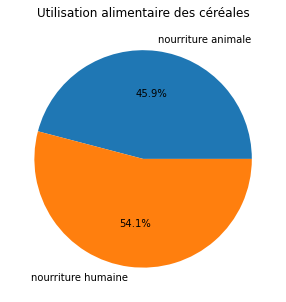

In [18]:
# Création du nouveau dataframe df_cereale_alimentaire
df_cereale_alimentaire = df_tous_produits_alimentaires[df_tous_produits_alimentaires['is_cereal'] == True].copy()

# Assignons à des variables la somme des céréales pour animaux et la somme des céréales pour humains, ainsi que le total des céréales
cereal_animaux = int(df_cereale_alimentaire['Aliments pour animaux'].sum())
cereal_humains = int(df_cereale_alimentaire['Nourriture'].sum())
cereal_total = cereal_animaux + cereal_humains

# Affichage des résultats en texte
print("Céréales pour l'alimentation animal " + "{:,}".format(cereal_animaux).replace(',',' ') + "kg (" + str(round((cereal_animaux / cereal_total)*100,1)) + "%)")
print("Céréales pour l'alimentation humaine " + "{:,}".format(cereal_humains).replace(',',' ') + "kg (" + str(round((cereal_humains / cereal_total)*100,1)) + "%)")
print("Total des céréales " + "{:,}".format(cereal_humains + cereal_animaux).replace(',',' ') + "kg (100%)")
# Affichage des resultats en graphique
plt.figure(figsize = (5,5))
plot = plt.pie(
    [cereal_animaux, cereal_humains], 
    labels=['nourriture animale', 'nourriture humaine'],
    autopct = lambda x: str(round(x, 1)) + '%')
plot = plt.title('Utilisation alimentaire des céréales')

_____________
# Question 12

## Objectif :
Affichage des 3 produits ayant la plus grande valeur du ratio 'Autres utilisations / disponibilité intérieure' et du ratio 'Nourriture animale / nourriture totale'

## Méthode
1. Identification des pays en sous-alimentation
2. Ciblage des 15 produits les plus exportés par ces pays en 2013
3. Ciblage des 200 plus importantes importations pour ces 15 produits en 2013
4. Groupage de ces importations par produit (par addition)
5. Calcul pour chacun des 15 produits les deux ratios demandés ('Autres utilisations / disponibilité intérieure' et 'Nourriture animale / nourriture totale')
6. Affichage des 3 produits ayant le ratio 'Autres utilisations / disponibilité intérieure' les plus élevés
7. Affichage des 3 produits ayant le ratio 'Nourriture animale / nourriture totale' les plus élevés



In [19]:
# Création du nouveau dataframe df_pays_faim avec seulement les pays en sous-nutrition
df_pays_faim = df_tous_produits_alimentaires[df_tous_produits_alimentaires['is_undernourishment'] == True].copy()

# Création du dataframe top_15_export nous servant à déterminer le top 15 des exports des pays en sous-alimentation
top_15_export = df_pays_faim.sort_values(by='Exportations - Quantité', ascending=False)[['Code Produit','Produit']].drop_duplicates()[0:15]

# Cherchons maintenant au niveau mondial les 200 importations les plus importantes concernant les produits du dataframe top_15_export
# le nouveau dataframe top_200_import_of_top_15_export sert à ranger ce resultat
top_200_import_of_top_15_export = df_tous_produits_alimentaires.loc[(df_tous_produits_alimentaires['Code Produit'].isin(top_15_export['Code Produit'])), :]
top_200_import_of_top_15_export = top_200_import_of_top_15_export.sort_values(by='Importations - Quantité', ascending=False)[['Code Produit','Produit','Importations - Quantité', 'Aliments pour animaux', 'Autres utilisations (non alimentaire)', 'Disponibilité intérieure', 'Nourriture']].drop_duplicates()[0:200]
top_200_import_of_top_15_export = top_200_import_of_top_15_export.groupby(['Code Produit']).sum()

# Création du dataframe allant nous servir à répondre à cette question
# Ce dataframe df_q12 est issu de la jointure entre les dataframe top_15_export et top_200_import_of_top_15_export
df_q12 = top_15_export.merge(top_200_import_of_top_15_export, how='left', on='Code Produit')
df_q12.reset_index(drop=True, inplace=True)
df_q12.index += 1

# Création des deux ratios 'Autres utilisations / disponibilité intérieure' et 'Nourriture animale / nourriture totale' dans deux nouvelles colonnes
df_q12['Autres utilisations / disponibilité intérieure'] = df_q12['Autres utilisations (non alimentaire)'] / df_q12['Disponibilité intérieure']
df_q12['Nourriture animale / nourriture totale'] = df_q12['Aliments pour animaux'] / (df_q12['Aliments pour animaux'] + df_q12['Nourriture'])

# Supression des colonnes devenues inutiles
df_q12.drop(['Code Produit','Importations - Quantité', 'Aliments pour animaux', 'Autres utilisations (non alimentaire)', 'Disponibilité intérieure', 'Nourriture'], axis= 1, inplace=True)

# Affichage du dataframe df_q12
display(df_q12)

# Affichage du top 3 du ratio 'Autres utilisations / disponibilité intérieure'
print("""
Top 3 Autres utilisations/Disponiblité intérieure:
""")
df_q12.sort_values(by='Autres utilisations / disponibilité intérieure', ascending=False, inplace=True)
for i in range(0,3):
    print(f"{i+1} - {df_q12['Produit'].iloc[i]} ({df_q12['Autres utilisations / disponibilité intérieure'].iloc[i]:.0%})")

# Affichage du top 3 du ratio 'Nourriture animale / nourriture totale'
print("""
Top 3 Aliments pour animaux/Nourriture + Aliments pour animaux:
""")
df_q12.sort_values(by='Nourriture animale / nourriture totale', ascending=False, inplace=True)
for i in range(0,3):
    print(f"{i+1} - {df_q12['Produit'].iloc[i]} ({df_q12['Nourriture animale / nourriture totale'].iloc[i]:.0%})")

,Produit,Autres utilisations / disponibilité intérieure,Nourriture animale / nourriture totale
1,Manioc,0.302335,0.622408
2,Huile de Palme,0.718114,0.000000
3,Maïs,0.259771,0.878122
4,Riz (Eq Blanchi),0.018664,0.093330
5,"Légumes, Autres",0.000000,0.049943
6,Soja,0.003284,0.646089
7,Blé,0.032849,0.245547
8,Sucre Eq Brut,0.038188,0.000000
9,Bananes,0.000000,0.000000
10,Poissons Pelagiques,0.000000,0.755359



Top 3 Autres utilisations/Disponiblité intérieure:

1 - Huile de Palme (72%)
2 - Huile de Soja (67%)
3 - Manioc (30%)

Top 3 Aliments pour animaux/Nourriture + Aliments pour animaux:

1 - Orge (98%)
2 - Maïs (88%)
3 - Poissons Pelagiques (76%)


_______
# Question 13

## Objectif :
Déterminer la quantité de céréales (en tonnes) libérées, si les Etats-Unis diminuaient de 10% leur production de produits animaux.

## Méthode
Récupèrons sur le dataframe principal df_tous_produits_alimentaires uniquement les lignes liées aux USA.  
Filtrons ensuite uniquement sur les produits céréaliers (grâce à la colonne 'is_cereal').   

Il ne nous reste plus qu'à déterminer par la calcul combien représente 10% du total des céréales destiné aux animaux produit par les USA.

In [20]:
df_q13 = df_tous_produits_alimentaires[df_tous_produits_alimentaires['Pays'] == "États-Unis d'Amérique"].copy()
df_q13 = df_q13[df_q13['is_cereal'] == True].copy()

cereales_animaux_usa_10percent = int((df_q13['Aliments pour animaux'].sum())* 0.1)

print("Si les USA produisaient 10% de produits animaux en moins, cela représenterait " + "{:,}".format(int(cereales_animaux_usa_10percent / 1000)).replace(',',' ') + " tonnes de céréales libérés pour l'alimentation humaine.")

Si les USA produisaient 10% de produits animaux en moins, cela représenterait 14 009 600 tonnes de céréales libérés pour l'alimentation humaine.


_________
# Question 14

## Objectifs :
Calculer pour la Thaïlande :
- La proportion du manioc exportée
- La proportion de personnes en sous-nutrition

## Méthode
On séléctionne les lignes du dataframe principal correspondantes au Manioc thailandais pour les stocker dans le dataframe df_q14.  
Il suffit ensuite de sortir les valeurs qui nou sont utiles :
- la production de manioc en Thaïlande
- l'exportation de manioc depuis la Thaïlande
- la population thailandaise
- et la population sous-alimentée thailandaise

On affiche enfin les résultats.

In [21]:
# Création du dataframe df_q14 à partir de df_tous_produits_alimentaires mais en ne sélectionnant que les lignes correspondantes au Manioc thailandais
df_q14 = df_tous_produits_alimentaires[df_tous_produits_alimentaires['Pays'] == 'Thaïlande'].copy()
df_q14 = df_q14[df_q14['Produit'] == 'Manioc'].copy()

# Assignation de la production et de l'exportation de Manioc en Thaïlande dans des variables
export_manioc_thai = df_q14['Exportations - Quantité'].iloc[0]
production_manioc_thai = df_q14['Production'].iloc[0]

# Assignation de la population totale et sous_alimentée en Thaïlande dans des variables
population_thai = df_tous_produits_alimentaires[df_tous_produits_alimentaires['Pays'] == 'Thaïlande'].iloc[0]['Population']
population_sous_alimentee_thai = df_sousalimentation[df_sousalimentation['Pays'] == 'Thaïlande']['Population sous-alimentée'].iloc[0]

# Affichage des résultats
print("Manioc exporté par la Thaïlande: " + "{:,}".format(int(export_manioc_thai/1000)).replace(',',' ') + " tonnes (soit " + "{:,}".format(round((export_manioc_thai / production_manioc_thai)*100,1)) + "% de la production).")
print("Population sous alimentée en Thaïlande: " + "{:,}".format(int(population_sous_alimentee_thai)).replace(',',' ') + " personnes (soit " + "{:,}".format(round((population_sous_alimentee_thai / population_thai)*100,1)) + "% de la population).")

Manioc exporté par la Thaïlande: 25 214 000 tonnes (soit 83.4% de la production).
Population sous alimentée en Thaïlande: 5 600 000 personnes (soit 8.4% de la population).


____________________
La première partie de ce projet est terminée.  
La deuxième partie consistant à entrer ce travail dans une base de données relationnelle, il nous faut exporter notre dataframe principal df_tous_produits_alimentaires

In [22]:
df_tous_produits_alimentaires.to_csv("Sources/export_travaux_partie1.csv", index=False)